# PROJECT --- SALARY DATASET

In [18]:
#import libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
#load the dataset
salary_set = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
salary_set

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
#display coulnm names of dataset
salary_set.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [4]:
#display rows and columns of dataset
salary_set.shape

(397, 6)

In [5]:
#drop the sex column
salary_set.drop('sex',axis=1,inplace=True)

In [6]:
#display coulnm names of dataset
salary_set.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'salary'], dtype='object')

In [7]:
#display rows and columns of dataset
salary_set.shape

(397, 5)

In [8]:
#display datatypes of columns
salary_set.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
salary            int64
dtype: object

In [9]:
#display information of columns
salary_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   salary         397 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.6+ KB


In [10]:
#display sum of null values in columns
salary_set.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
salary           0
dtype: int64

<AxesSubplot:>

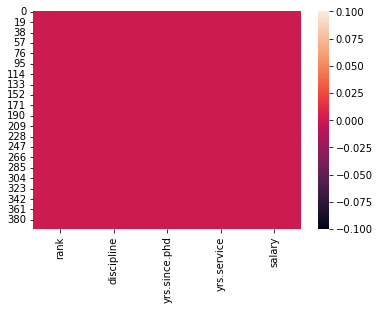

In [11]:
#display heatmap of null values in columns
sb.heatmap(salary_set.isnull())

In [12]:
#seperate columns into numeric and categorical dataset.
numeric_data = salary_set.select_dtypes(include=[np.number])
categorical_data = salary_set.select_dtypes(exclude=[np.number])

In [13]:
#columns of categorical dataset.
categorical_data.columns

Index(['rank', 'discipline'], dtype='object')

In [14]:
#columns of numeric dataset.
numeric_data.columns

Index(['yrs.since.phd', 'yrs.service', 'salary'], dtype='object')

In [15]:
#display categorical dataset.
categorical_data

,rank,discipline
0,Prof,B
1,Prof,B
2,AsstProf,B
3,Prof,B
4,Prof,B
...,...,...
392,Prof,A
393,Prof,A
394,Prof,A
395,Prof,A


In [16]:
#display numeric dataset.
numeric_data

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500
...,...,...,...
392,33,30,103106
393,31,19,150564
394,42,25,101738
395,25,15,95329


In [19]:
#apply encoding technique on string or object variable.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
list1 = ['rank','discipline']
for val in list1:
    categorical_data[val] = le.fit_transform(categorical_data[val].astype(str))
categorical_data    

,rank,discipline
0,2,1
1,2,1
2,1,1
3,2,1
4,2,1
...,...,...
392,2,0
393,2,0
394,2,0
395,2,0


In [20]:
#summary statistics.
numeric_data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


yrs.since.phd       AxesSubplot(0.125,0.125;0.227941x0.755)
yrs.service      AxesSubplot(0.398529,0.125;0.227941x0.755)
salary           AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

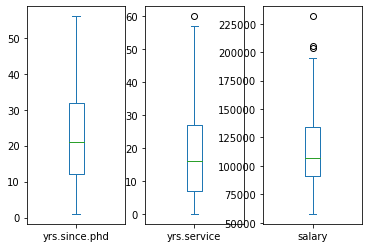

In [21]:
#display boxplot of numeric columns.
numeric_data.plot(kind='box',subplots=True,layout=(1,3))

In [ ]:
#display boxplot of columns
salary_set.plot(kind='box',subplots=True,layout=(1,3))

In [22]:
#display zscore for removing outliers.
from scipy.stats import zscore
z = np.abs(zscore(numeric_data))
z

,yrs.since.phd,yrs.service,salary
0,0.257550,0.029669,0.860919
1,0.179854,0.124300,1.966672
2,1.422982,1.125098,1.122495
3,1.762533,1.646343,0.042760
4,1.374055,1.800312,0.918768
...,...,...,...
392,0.830187,0.953483,0.350418
393,0.674796,0.106654,1.218396
394,1.529446,0.568560,0.395640
395,0.208623,0.201284,0.607502


In [23]:
#threshold for zscore values ----> above 3 are considerd outliers.
threshold = 3 
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([2, 1, 1, 2], dtype=int64))


In [24]:
#removing outliers.
numeric_data_new = numeric_data[(z<3).all(axis=1)]  

In [25]:
#display numeric dataset rows and columns.
numeric_data.shape

(397, 3)

In [26]:
#display new numeric dataset rows and columns without outliers.
numeric_data_new.shape

(393, 3)

In [27]:
#assign new numeric dataset into old numeric dataset.
numeric_data = numeric_data_new
numeric_data.shape

(393, 3)

In [28]:
#display skew of numeric columns.
numeric_data.skew()

yrs.since.phd    0.288531
yrs.service      0.588861
salary           0.581098
dtype: float64

array([[<AxesSubplot:title={'center':'yrs.since.phd'}>,
        <AxesSubplot:title={'center':'yrs.service'}>],
       [<AxesSubplot:title={'center':'salary'}>, <AxesSubplot:>]],
      dtype=object)

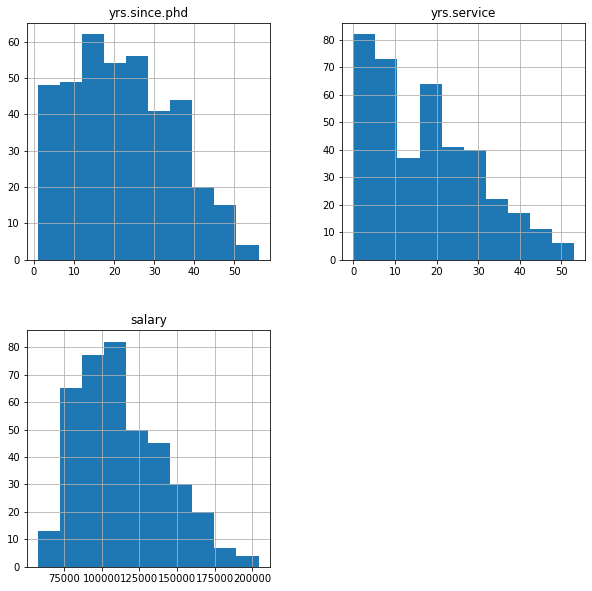

In [29]:
#display histogram plot of numeric columns.
numeric_data.hist(figsize=(10,10),bins=10)

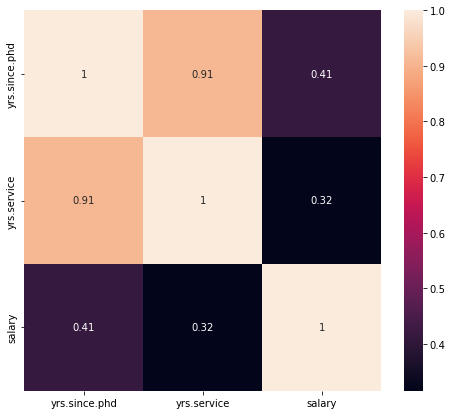

In [30]:
#display correlations of numeric columns.
corr_hmap = numeric_data.corr()
plt.figure(figsize=(8,7))
sb.heatmap(corr_hmap,annot=True)
plt.show()

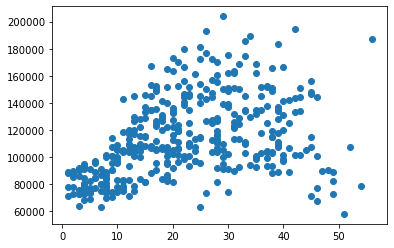

In [31]:
#display scatter plot between two variables.
plt.scatter(numeric_data['yrs.since.phd'],numeric_data['salary'])
plt.show()

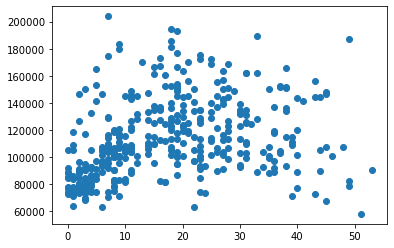

In [32]:
#display scatter plot between two variables.
plt.scatter(numeric_data['yrs.service'],numeric_data['salary'])
plt.show()

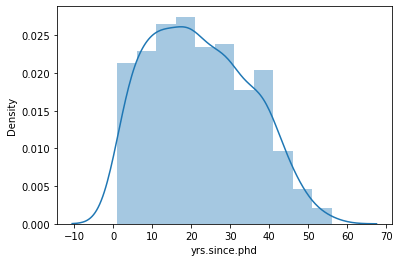

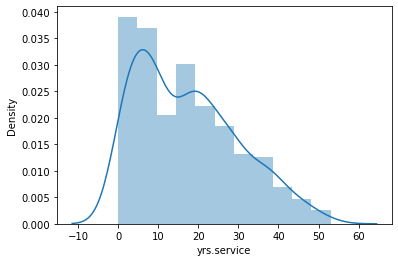

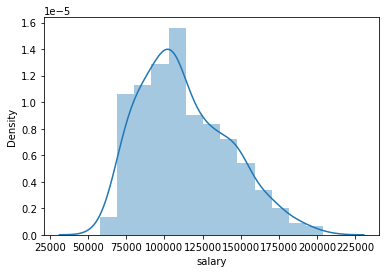

In [33]:
#display dist plot of each numeric columns.
for i in numeric_data:
    plt.figure()
    sb.distplot(numeric_data[i])

In [34]:
#combine numeric and categorical dataset in dataframe
df1 = pd.DataFrame(data = numeric_data)
df2 = pd.DataFrame(data = categorical_data)

In [35]:
df_new = df1.join(df2)

In [36]:
df_new

,yrs.since.phd,yrs.service,salary,rank,discipline
0,19,18,139750,2,1
1,20,16,173200,2,1
2,4,3,79750,1,1
3,45,39,115000,2,1
4,40,41,141500,2,1
...,...,...,...,...,...
392,33,30,103106,2,0
393,31,19,150564,2,0
394,42,25,101738,2,0
395,25,15,95329,2,0


In [37]:
#display all input variable rows and columns
x = df_new.iloc[:,df_new.columns!='salary']
x.head()

,yrs.since.phd,yrs.service,rank,discipline
0,19,18,2,1
1,20,16,2,1
2,4,3,1,1
3,45,39,2,1
4,40,41,2,1


In [38]:
#display output variable rows and columns.
y = df_new.iloc[:,df_new.columns=='salary']
y.head()

,salary
0,139750
1,173200
2,79750
3,115000
4,141500


In [39]:
#display number of input variable rows and columns
x.shape

(393, 4)

In [40]:
#display number of output variable rows and columns
y.shape

(393, 1)

In [42]:
#split the dataset into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=42)

In [43]:
#display number of input variable rows and columns of x_train
x_train.shape

(314, 4)

In [44]:
#display number of output variable rows and columns of y_train
y_train.shape

(314, 1)

In [45]:
#display number of input variable rows and columns of x_test
x_test.shape

(79, 4)

In [46]:
#display number of output variable rows and columns of y_test
y_test.shape

(79, 1)

In [47]:
#apply linear regression model
lm = LinearRegression()

In [48]:
#apply fit method of linear regression model 
lm.fit(x_train,y_train)

LinearRegression()

In [49]:
#display coefficient values
lm.coef_

array([[ 1255.78775544,  -693.19020723, 14989.29841694, 16655.48982413]])

In [50]:
#display intercept values
lm.intercept_

array([65386.06954632])

In [51]:
#display score of linear model
lm.score(x_train,y_train)

0.41080026551307003

In [52]:
#predict the value
pred = lm.predict(x_test)
print("predicted result price:",pred)
print("actual price",y_test)

predicted result price: [[103179.20390556]
 [115577.95120364]
 [126930.17983728]
 [126346.28022763]
 [116009.95609283]
 [137005.31865405]
 [143535.5308267 ]
 [118742.49000959]
 [132152.98720347]
 [119385.5413821 ]
 [122146.91207213]
 [ 99974.43818746]
 [120380.14381951]
 [121453.7218649 ]
 [ 85830.5238742 ]
 [127392.49971606]
 [129210.88501971]
 [ 87648.90917785]
 [116140.54875185]
 [140029.35287842]
 [125010.03864789]
 [121123.47286144]
 [126517.0997988 ]
 [123402.69982756]
 [111599.54145401]
 [110434.11944544]
 [100105.03084647]
 [100667.62839469]
 [128646.80925519]
 [131500.02390839]
 [ 98286.64554283]
 [115015.35365543]
 [138101.67697719]
 [120078.73158932]
 [ 89747.10547423]
 [ 93998.09068076]
 [109258.78551431]
 [ 88360.72505978]
 [131238.83859036]
 [116190.68758656]
 [132404.26059894]
 [127210.29000602]
 [116100.3218397 ]
 [ 98718.65043202]
 [119765.92922027]
 [124527.89492399]
 [127732.66064208]
 [131761.20922642]
 [124107.28017366]
 [ 99281.24798023]
 [ 87104.93730434]
 [ 8779

In [53]:
#display MAE, MSE and RMSE 
print('error:')

print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squared error',mean_squared_error(y_test,pred))

print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error 20683.65605723982
mean squared error 677599311.7713599
Root mean squared error 26030.737826103967


In [54]:
#apply regularization techniques.
from sklearn.linear_model import Lasso,Ridge,ElasticNet

#default value of alpha is 1.0
ls = Lasso(alpha=.0001)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
predlasso = ls.predict(x_test)
print(mean_squared_error(y_test,predlasso))
print("mean squared error",np.sqrt(mean_squared_error(y_test,predlasso)))

0.4108002655130699
677599310.9424355
mean squared error 26030.737810181938


In [55]:
ls.coef_

array([ 1255.78775126,  -693.19019863, 14989.2982009 , 16655.48940905])

In [56]:
rd = Ridge(alpha=.0001)
rd.fit(x_train,y_train)
print(rd.score(x_train,y_train))
predridge = rd.predict(x_test)
print(mean_squared_error(y_test,predridge))
print("mean squared error",np.sqrt(mean_squared_error(y_test,predridge)))

0.41080026551286897
677599260.287087
mean squared error 26030.736837190892


In [57]:
#elasticnet is a combination of both Lasso and Ridge
enr = ElasticNet(alpha=.0001)
enr.fit(x_train,y_train)
enrpred = enr.predict(x_test)
print(enr.score(x_train,y_train))
print(mean_squared_error(y_test,enrpred))
print("mean squared error",np.sqrt(mean_squared_error(y_test,enrpred)))

0.4108002605562193
677591234.3959619
mean squared error 26030.58267492224


In [58]:
enr.coef_

array([ 1255.8046787 ,  -693.17429983, 14987.62079451, 16652.0851909 ])

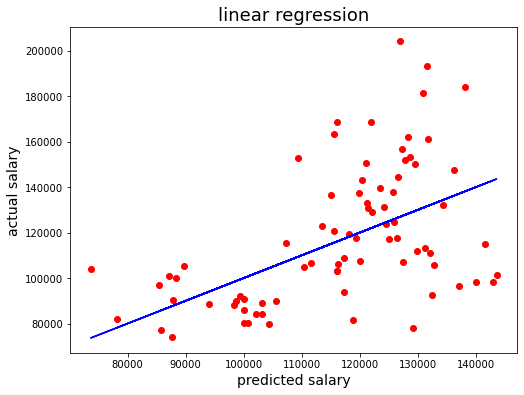

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(x=pred, y=y_test, color = 'r')
plt.plot(pred,pred,color='b')
plt.xlabel("predicted salary",fontsize=14)
plt.ylabel("actual salary",fontsize=14)
plt.title("linear regression",fontsize=18)
plt.show()